<a href="https://colab.research.google.com/github/Deeksha-Data-Scientist/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [162]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso


In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
dataset = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv" ,encoding= 'unicode_escape')

In [165]:
len(dataset)

8760

In [166]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [167]:
dataset.shape

(8760, 14)

In [168]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [169]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [171]:
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [172]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


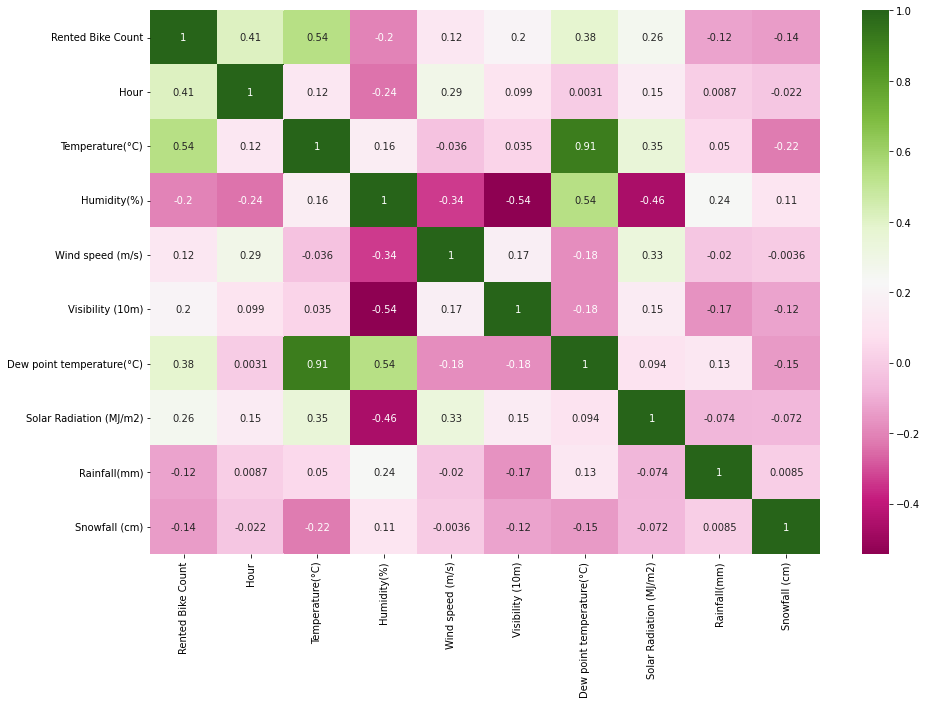

In [173]:


#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='PiYG',annot=True)



There is high correlation between Temperature and Dew_point_temperature.

**Exploratory Data Analysis(EDA)**

In [174]:


# Date columns to Date format conversion

dataset['Date']= pd.to_datetime(dataset['Date'])



In [175]:
# extracting day,month, day of week and weekdays/weekend from date column

dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['month'] = dataset['Date'].apply(lambda x : x.month)
dataset['year'] = dataset['Date'].apply(lambda x : x.year)
dataset['day'] = dataset['Date'].apply(lambda x : x.day)
dataset['day_of_week'] = dataset['Date'].dt.day_name()
dataset['weekdays_weekend']=dataset['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
dataset=dataset.drop(columns=['Date','day_of_week'],axis=1)

In [176]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'year', 'day',
       'weekdays_weekend'],
      dtype='object')

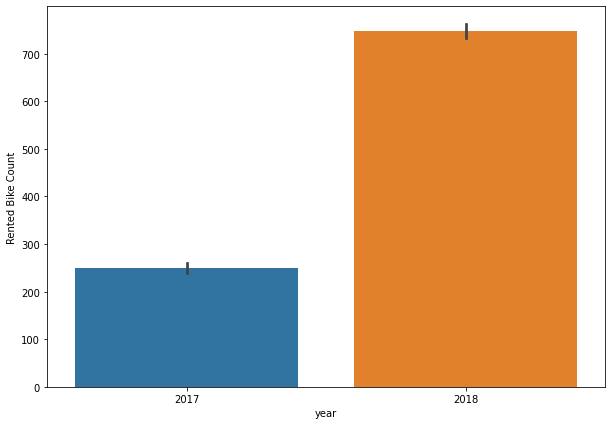

In [177]:
# Rented Bike count Yearwise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.year,y=dataset['Rented Bike Count'])

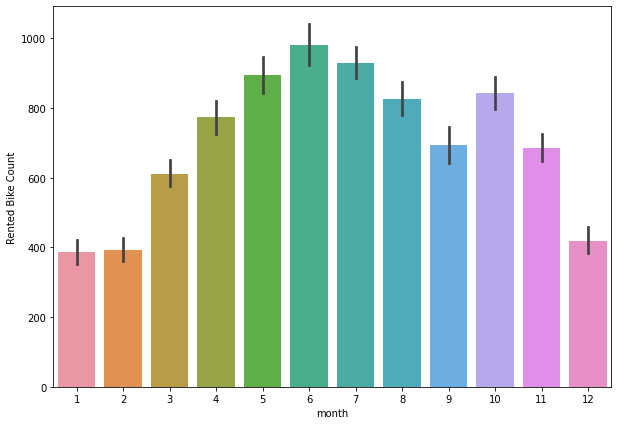

In [178]:
# Rented Bike count Monthwise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.month,y=dataset['Rented Bike Count'])

Rented bike demand is higher in the month of May, June, July

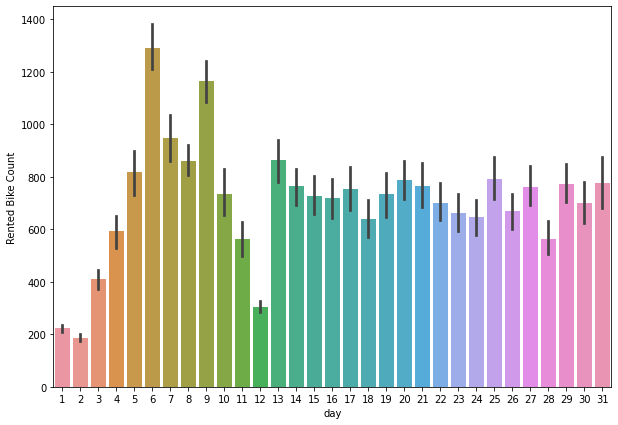

In [179]:
# Rented Bike count Daywise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.day,y=dataset['Rented Bike Count'])

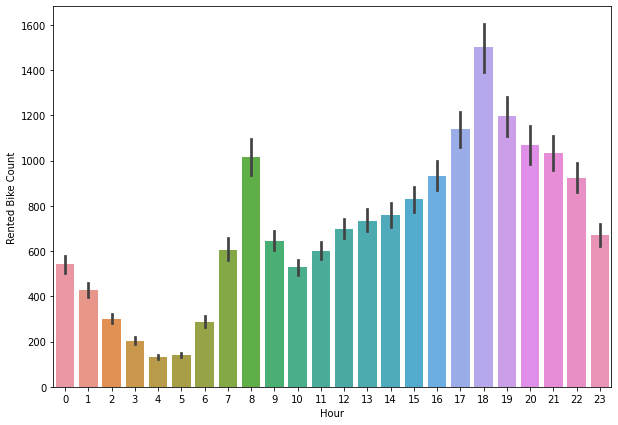

In [180]:
# Rented Bike count Daywise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.Hour,y=dataset['Rented Bike Count'])

we can see that Rented Bike demand is higher in day 6 , 7 & 9 .

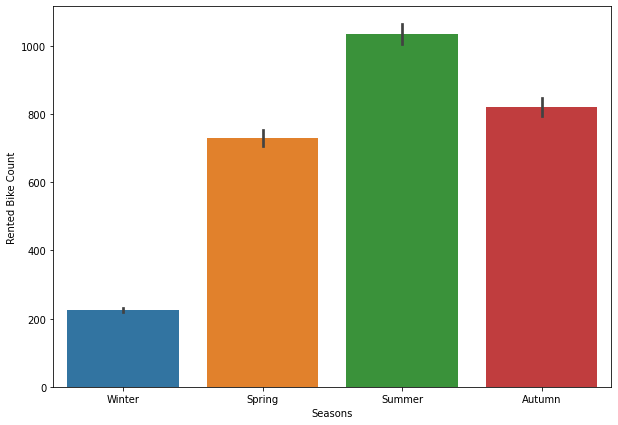

In [181]:
# Rented Bike count Seasonwise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.Seasons,y=dataset['Rented Bike Count'])

The above plot shows that in Summer, Autumn and, Spring seasons have Higher Rented bike demand.

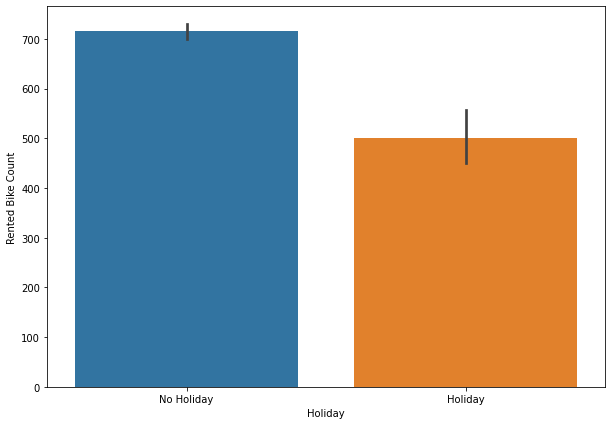

In [182]:
# Rented Bike count Daywise
plt.figure(figsize=(10,7))
sns.barplot(x=dataset.Holiday,y=dataset['Rented Bike Count'])

The above plot shows that in No holiday have Higher Rented bike demand.

**Distribution plot of rented bike count**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


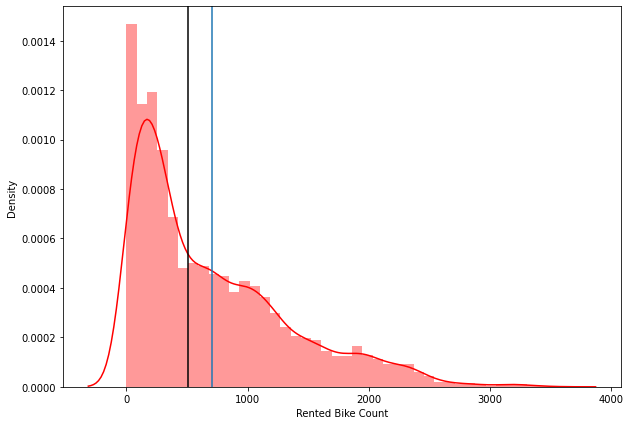

In [183]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,7))
plt.xlabel("rented bike count")
plt.ylabel("Density")
dist=sns.distplot(dataset['Rented Bike Count'],hist=True,color="Red")
dist.axvline(dataset['Rented Bike Count'].mean())
dist.axvline(dataset['Rented Bike Count'].median(),color='black')
plt.show()


In distribution graph we can see that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that ‘the distribution of dependent variable has to be normal’, so we should perform some operation to make it normal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


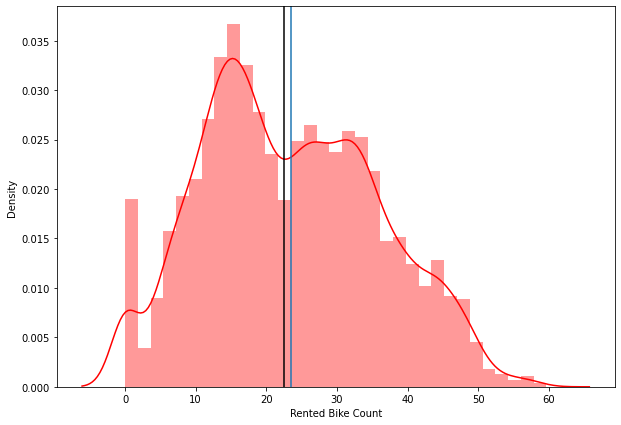

In [184]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,7))
plt.xlabel("rented bike count")
plt.ylabel("Density")
dist=sns.distplot(np.sqrt(dataset['Rented Bike Count']),hist=True,color="Red")
dist.axvline(np.sqrt(dataset['Rented Bike Count']).mean())
dist.axvline(np.sqrt(dataset['Rented Bike Count']).median(),color='black')
plt.show()

Since generic rule for the skewed variable is Square root  in order to make it normal, Now we have get here almost normal distribution.

**`Creating Train and Test Dataset`**

In [185]:
numeric_features= dataset.select_dtypes(exclude='object')
categorical_features= dataset.select_dtypes(include='object')
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)


In [186]:
numeric_features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,year,day,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,2018,30,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,2018,30,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,2018,30,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,2018,30,0


In [187]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [188]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [189]:
final_dataset= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
final_dataset.columns

Index(['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Rented Bike Count',
       'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'year', 'day', 'weekdays_weekend'],
      dtype='object')

# **Functions**

**Creating Function to train linear models**

In [190]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [191]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))

  plt.legend(["Predicted","Actual"])
  plt.show()



# **Creating function to run diffirent models**

In [192]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

**Creating function to get feature importance**

In [209]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [193]:
# Creating Train and Test Dataset
x=final_dataset.drop(['Rented Bike Count'],axis=1)
y=np.sqrt(final_dataset['Rented Bike Count'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)

(6570, 18)
(2190, 18)



================Evalution Matrix=========================

MSE : 174879.26458588152
RMSE : 418.18568194748315
R2 : 0.5746409013441218
Adjusted R2 :  0.5711142022304387

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



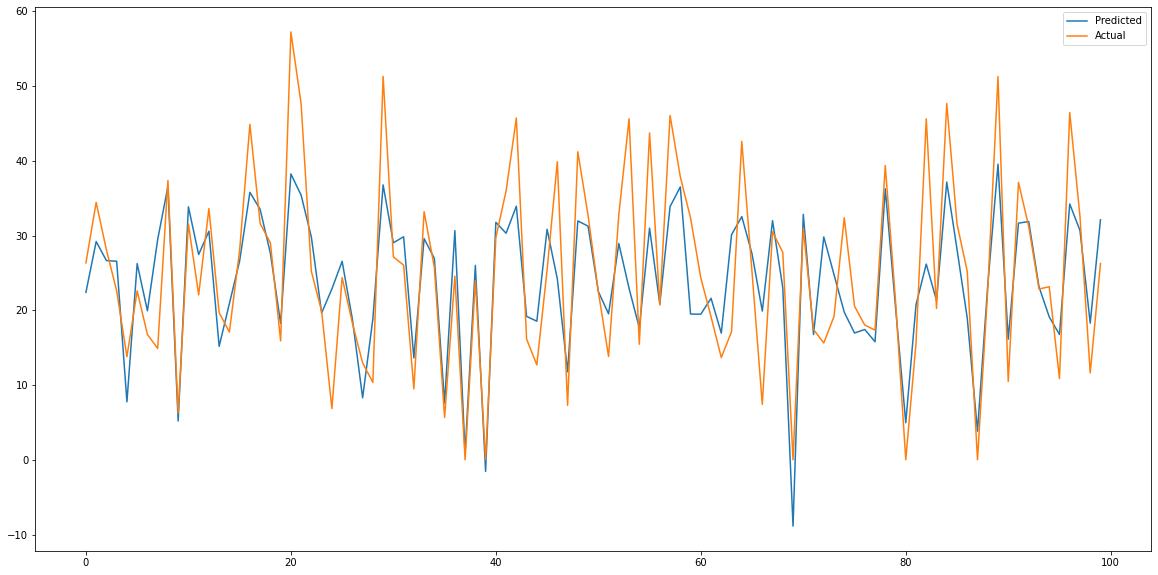

In [194]:
#linear regression model
linear_modal=LinearRegression()
train_linear_model(linear_modal,x_train,y_train,x_test,y_test)


# **Lasso Regression**

In [195]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 174935.94265507464
RMSE : 418.25344308812885
R2 : 0.5745030431910547
Adjusted R2 :  0.5709752010802481

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



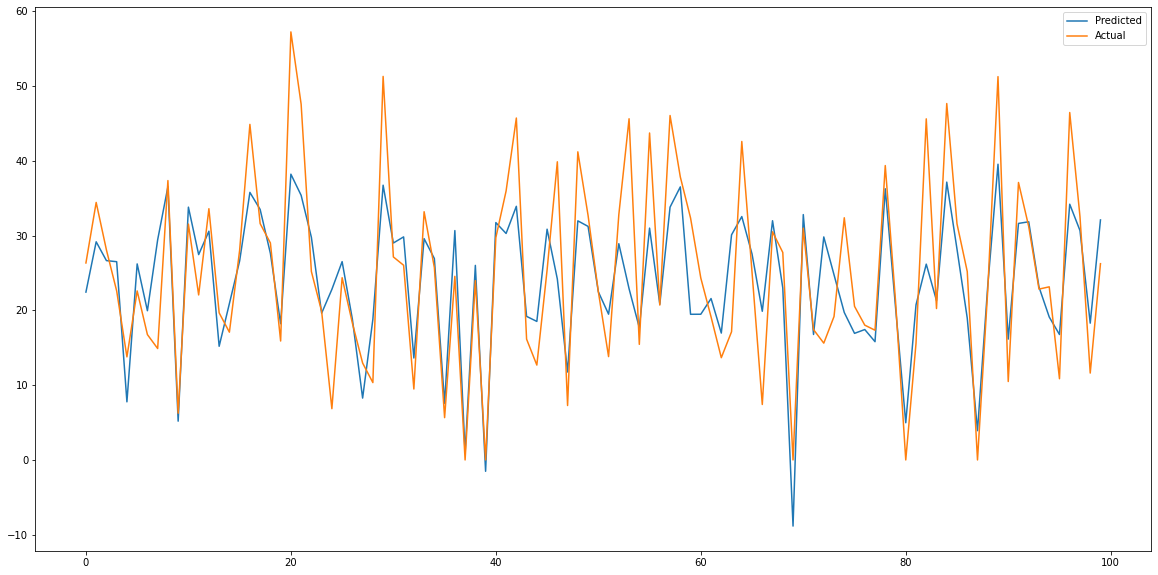

In [196]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,x_train,y_train,x_test,y_test)



# **Ridge Regression**

In [197]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 174916.6253090002
RMSE : 418.2303495790331
R2 : 0.5745500288010075
Adjusted R2 :  0.5710225762530655

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



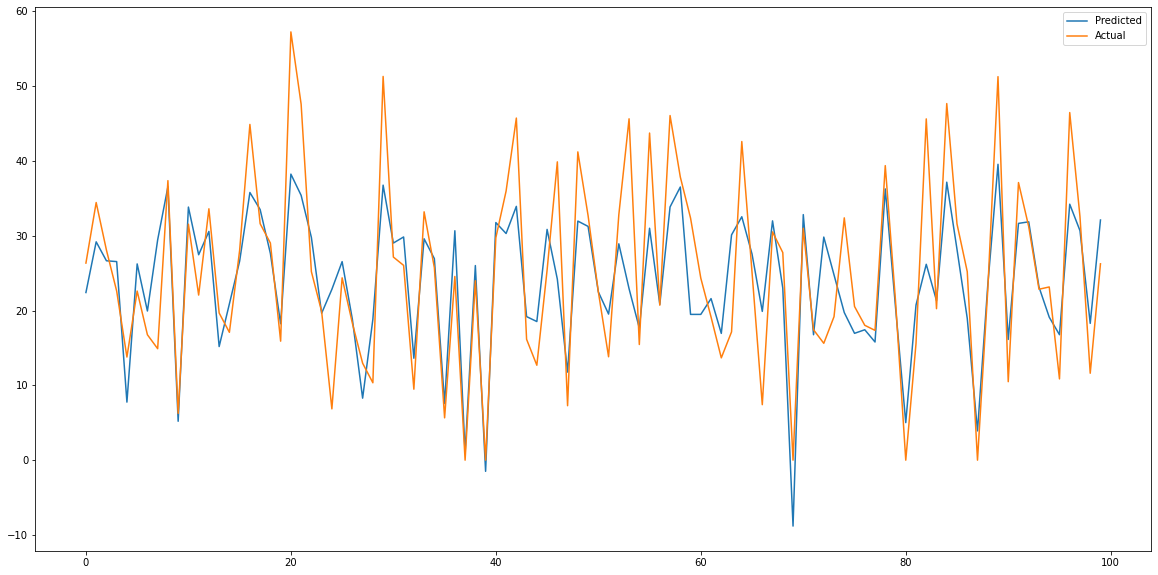

In [198]:

# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,x_train,y_train,x_test,y_test)


# **ElasticNet Regression**


In [199]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+05, tolerance: 8.227e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+05, tolerance: 8.120e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


================Evalution Matrix=========================

MSE : 174923.09147892892
RMSE : 418.23807990058594
R2 : 0.5745343011261504
Adjusted R2 :  0.5710067181783248

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



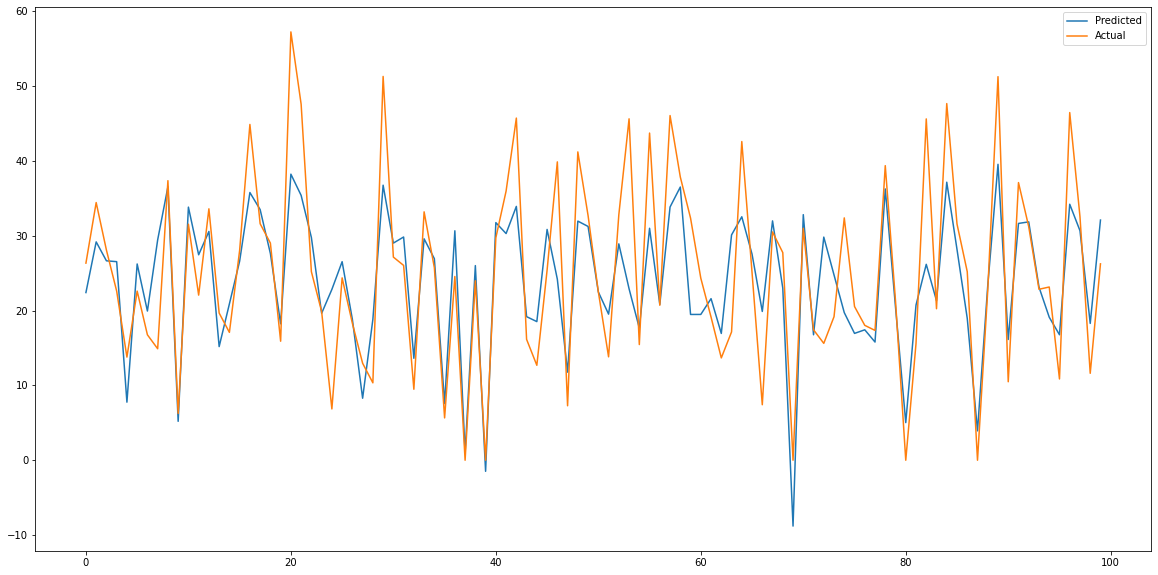

In [200]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,x_train,y_train,x_test,y_test)



# **Polynomial Regression**

In [201]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [202]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 116199.06384477869
RMSE : 340.87983783846573
R2 : 0.7173688419909892
Adjusted R2 :  0.7150255159457739

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



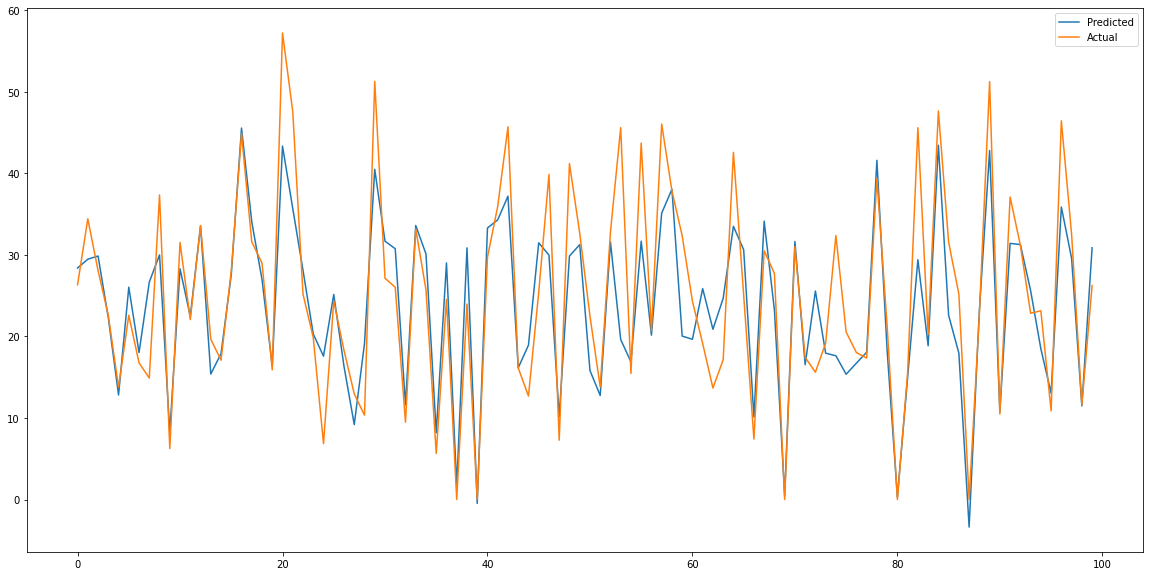

In [203]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,x_train,y_train,x_test,y_test)



# **Train | Test split Data For Tree based methods**


In [204]:
#creatin X for independent variable
X=final_dataset.drop(['Rented Bike Count'],axis=1)

In [205]:
#creating y for dependent variable
y=final_dataset['Rented Bike Count']

In [206]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# **Decision Tree Regression**

In [207]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 87489.67397260274
RMSE : 295.78653446802264
R2 : 0.7861938813300517
Adjusted R2 :  0.7844211912627744

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



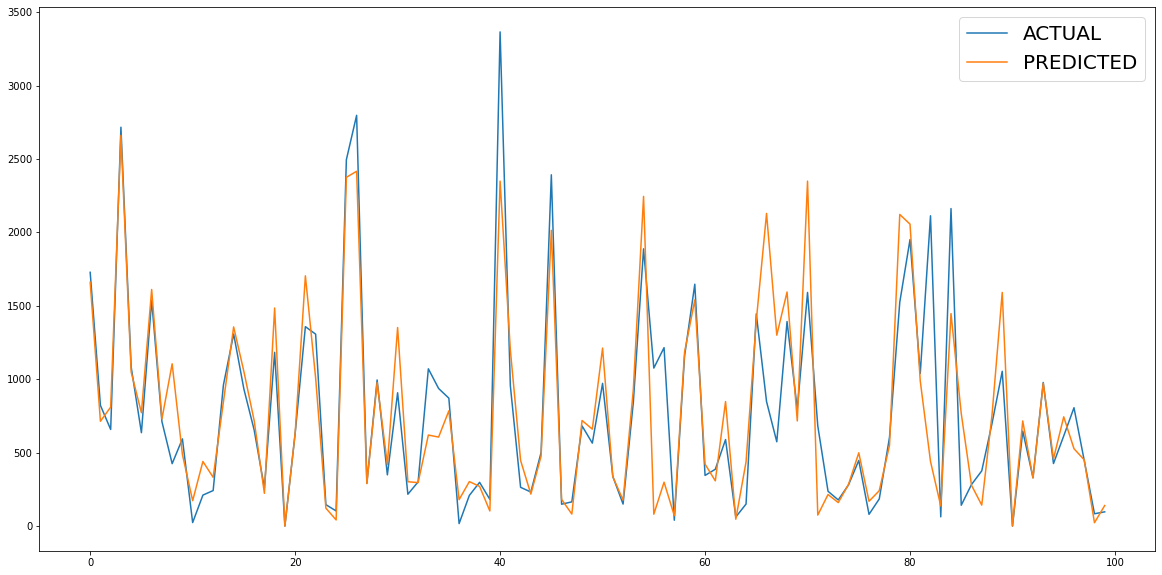

In [208]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

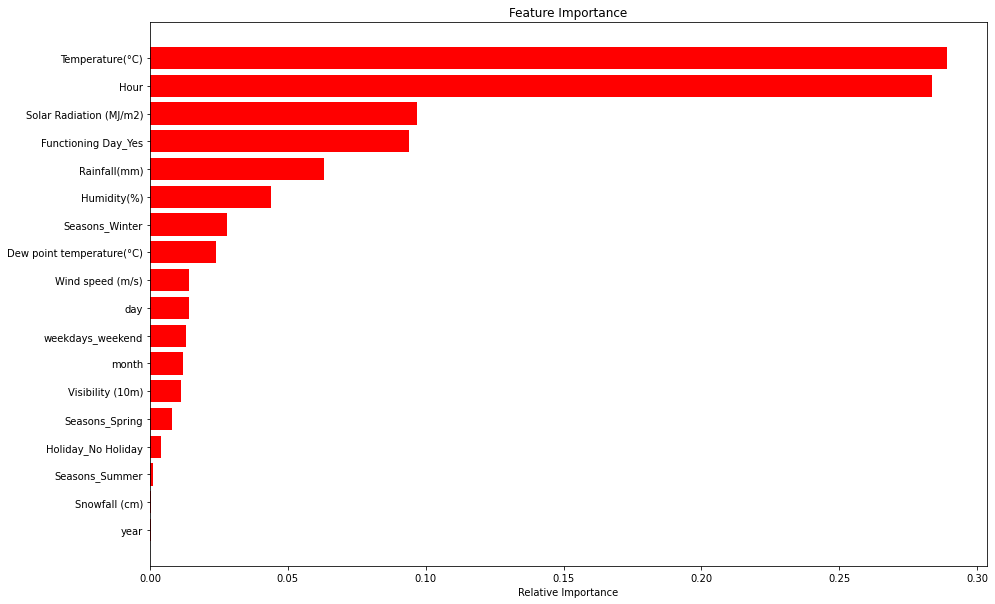

In [210]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)


# **Random Forest**

In [211]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [212]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [213]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [214]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 62157.32192293623
RMSE : 249.31370183553136
R2 : 0.8481007512792527
Adjusted R2 :  0.8468413378858978

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



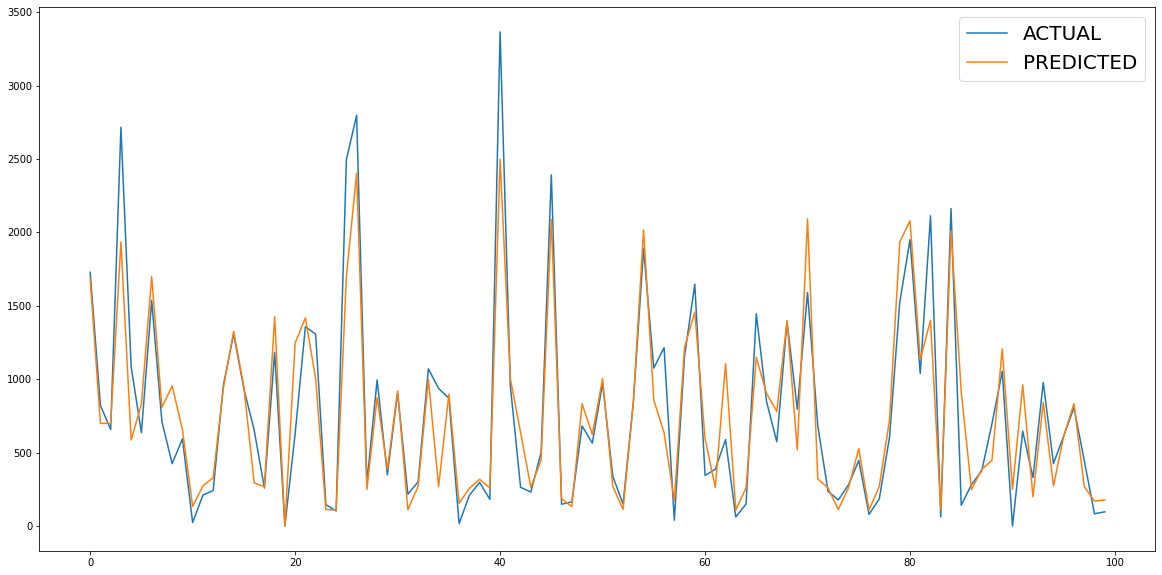

In [215]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [223]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

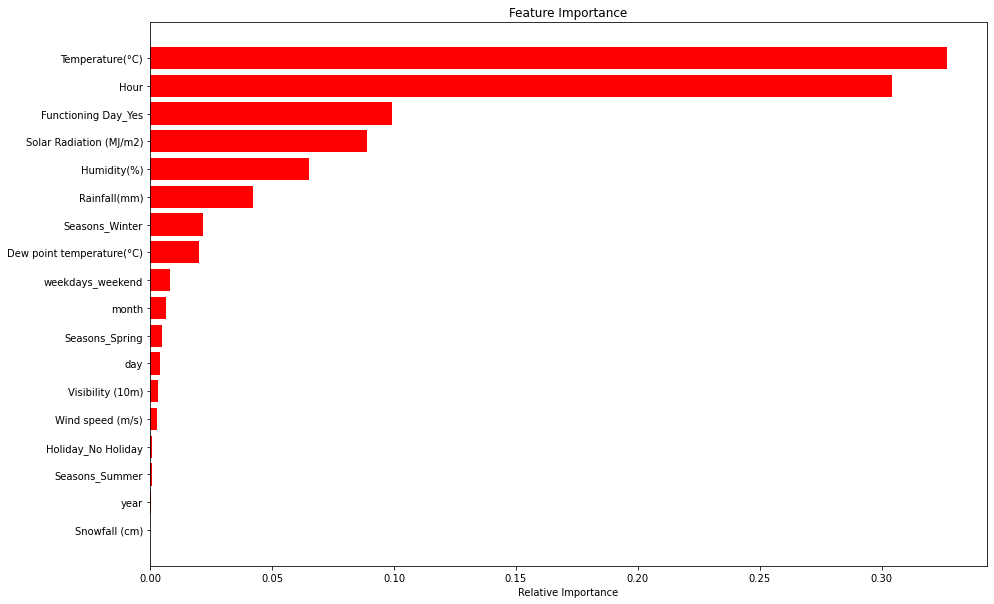

In [224]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)


# **Combined Evaluation Matrix of All the models**

In [216]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [217]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Decision_Tree','Random_Forest']


In [218]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [219]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,Decision_Tree,Random_Forest
Mean_square_error,174879.264586,174935.942655,174916.625309,174923.091479,116199.063845,87489.673973,62157.321923
Root_Mean_square_error,418.185682,418.253443,418.230350,418.238080,340.879838,295.786534,249.313702
R2,0.574641,0.574503,0.574550,0.574534,0.717369,0.786194,0.848101
Adjusted_R2,0.571114,0.570975,0.571023,0.571007,0.715026,0.784421,0.846841


In [220]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [221]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,174879.264586,418.185682,0.574641,0.571114
1,Lasso,174935.942655,418.253443,0.574503,0.570975
2,Ridge,174916.625309,418.230350,0.574550,0.571023
3,Elasticnet,174923.091479,418.238080,0.574534,0.571007
4,Polynomial,116199.063845,340.879838,0.717369,0.715026
5,Decision_Tree,87489.673973,295.786534,0.786194,0.784421
6,Random_Forest,62157.321923,249.313702,0.848101,0.846841


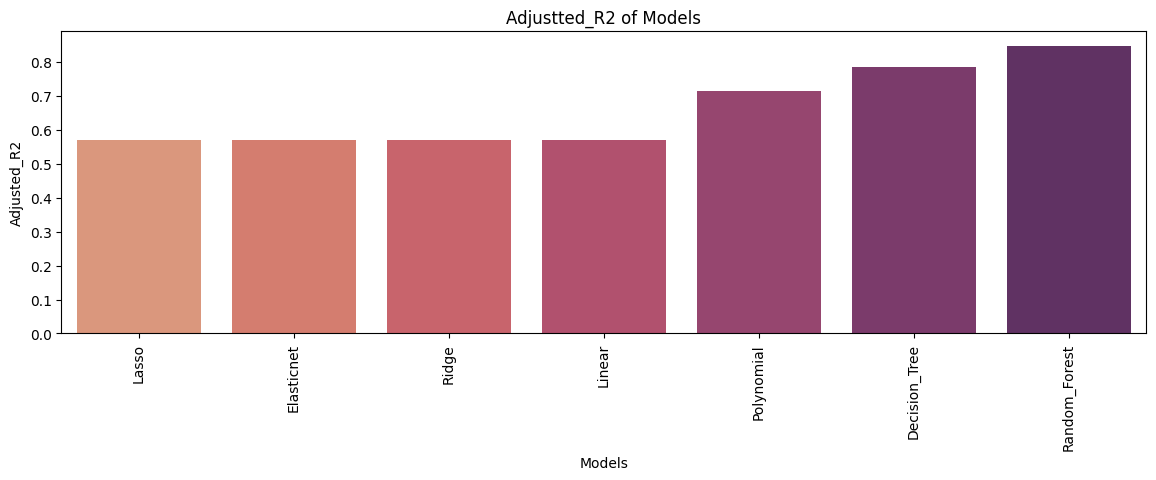

In [222]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# **Final Conclusion:**

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

7.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

8.After performing the various models the Decision_Tree and Random_Forest to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Decision_Tree and Random_Forest !

9.We can use either Decision_Tree or Random_Forest for the bike rental stations.